Q-2. Imagine you have a dataset where you have different features like 
`
Age ,Gender , Height , Weight , BMI , and Blood Pressure 
`
and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
dataset = 'https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels'

In [94]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [15]:
# dropping height and weight because they are already taken into bmi calculation
data = df.drop(columns = ['Height', 'Weight'])

In [33]:
# finding numerical features
num_col = []
for column in data:
    if type(data[column][0]) == np.float64 or type(data[column][0]) == np.int64:
        num_col.append(column)

In [34]:
num_col

['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

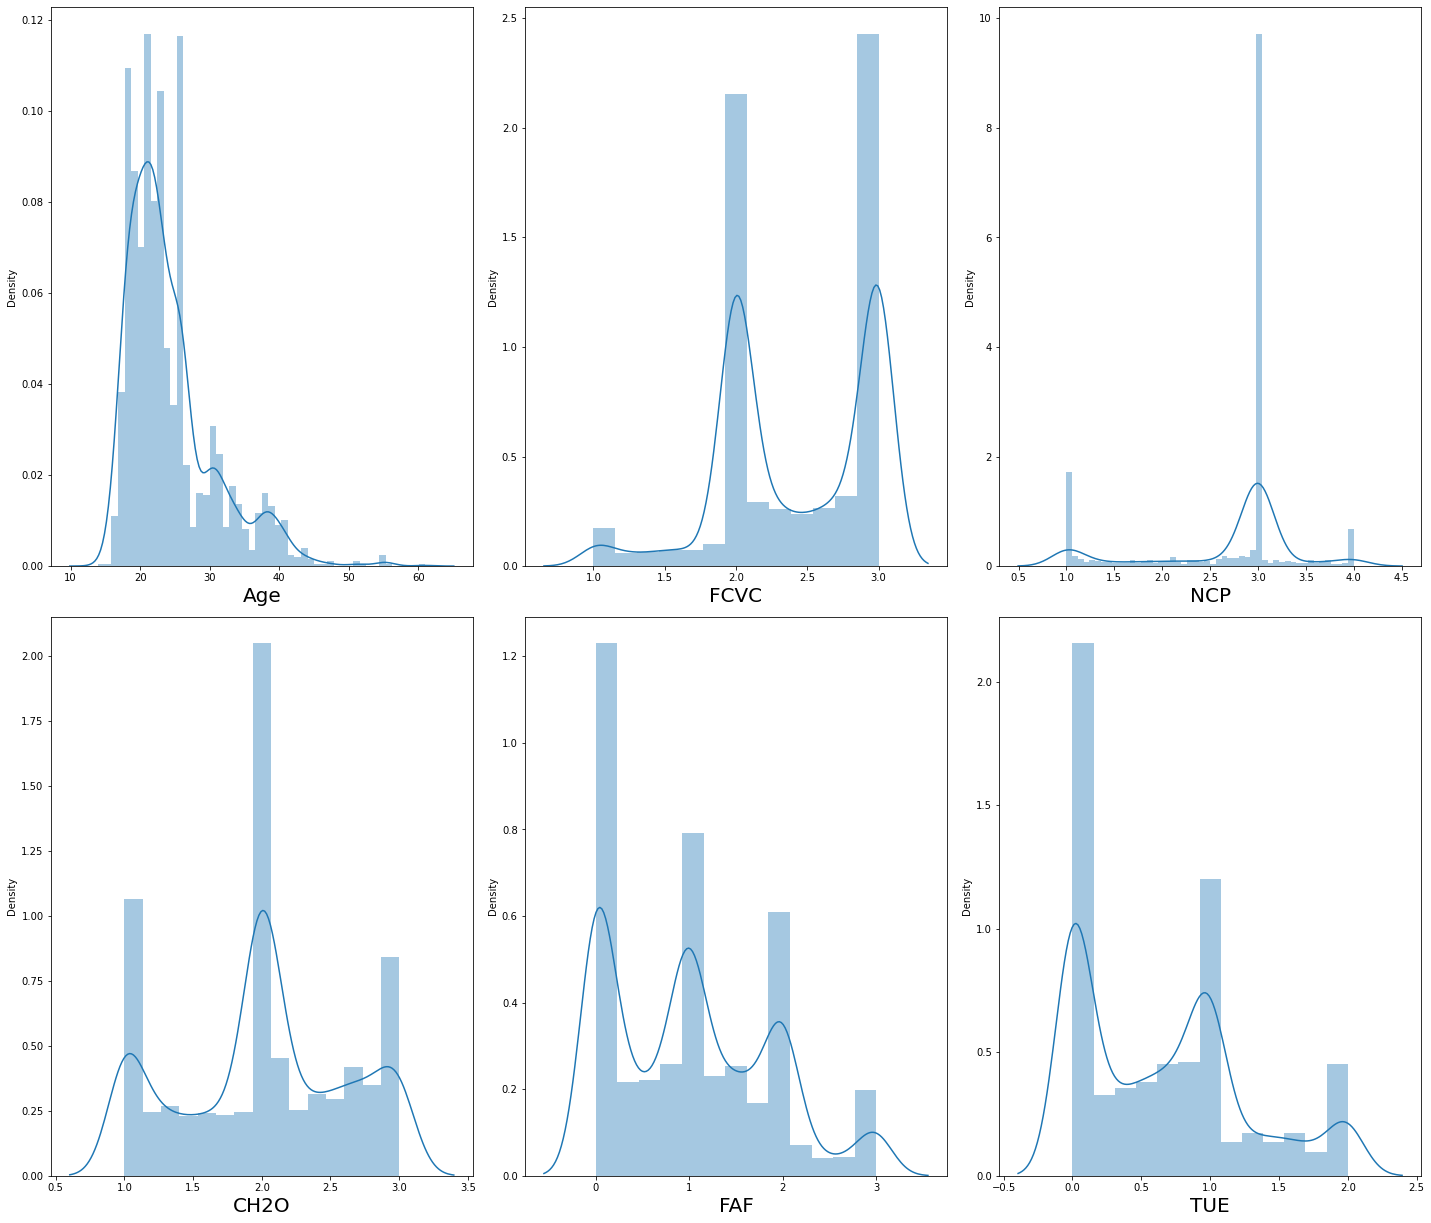

In [36]:
# checking the distribution of numerical features
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in num_col:
     if plotnumber<=6:
            ax = plt.subplot(3,3,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column,fontsize=20)
            plotnumber+=1
plt.tight_layout()         

<AxesSubplot:>

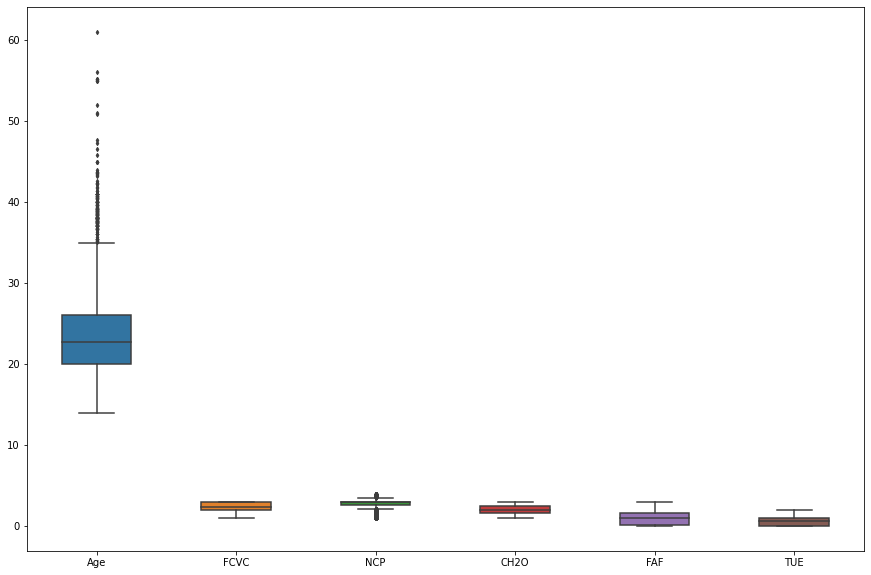

In [39]:
# checking for the outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax, fliersize=3)

age column has outliers. Let's remove them

In [40]:
q = data['Age'].quantile(0.98)

# we are removing the top 2% data from the Age column
data_cleaned = data[data['Age']<q]

C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

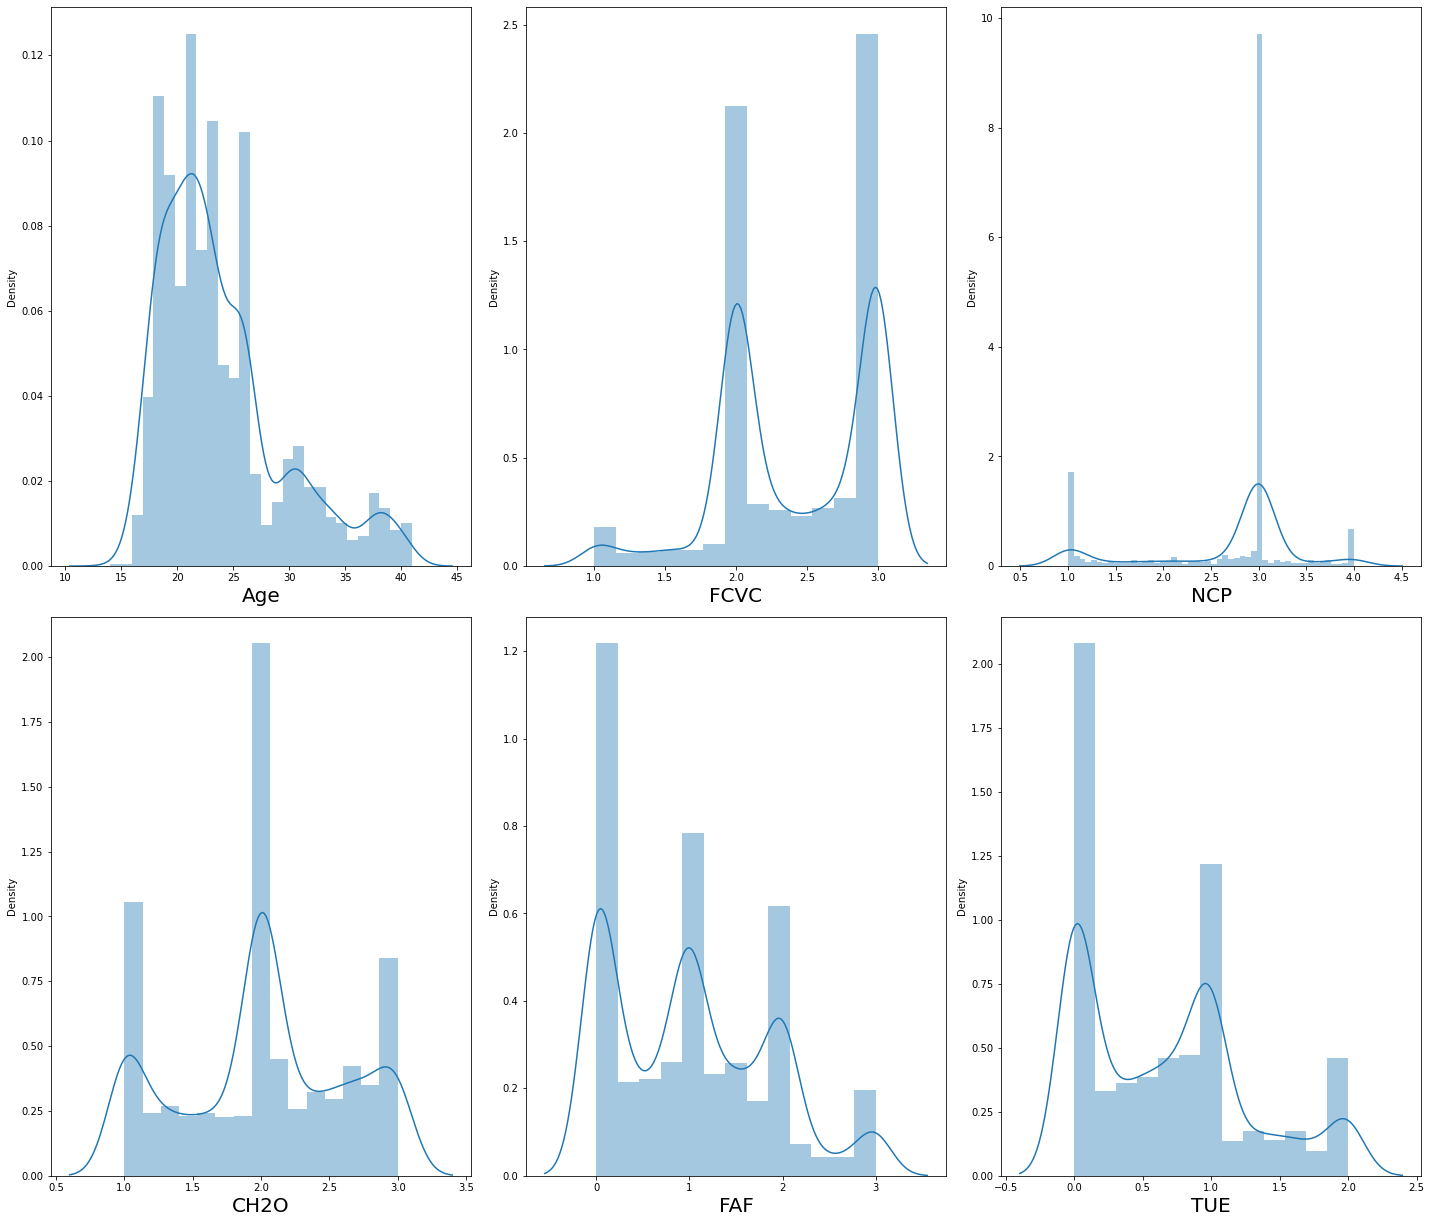

In [41]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in num_col:
     if plotnumber<=6:
            ax = plt.subplot(3,3,plotnumber)
            sns.distplot(data_cleaned[column])
            plt.xlabel(column,fontsize=20)
            plotnumber+=1
plt.tight_layout() 

In [42]:
# selecting dependent and independent features
y = data_cleaned['NObeyesdad']
X =data_cleaned.drop(columns = ['NObeyesdad'])

In [43]:
X.shape

(2068, 14)

In [49]:
y.nunique()

7

In [50]:
y.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

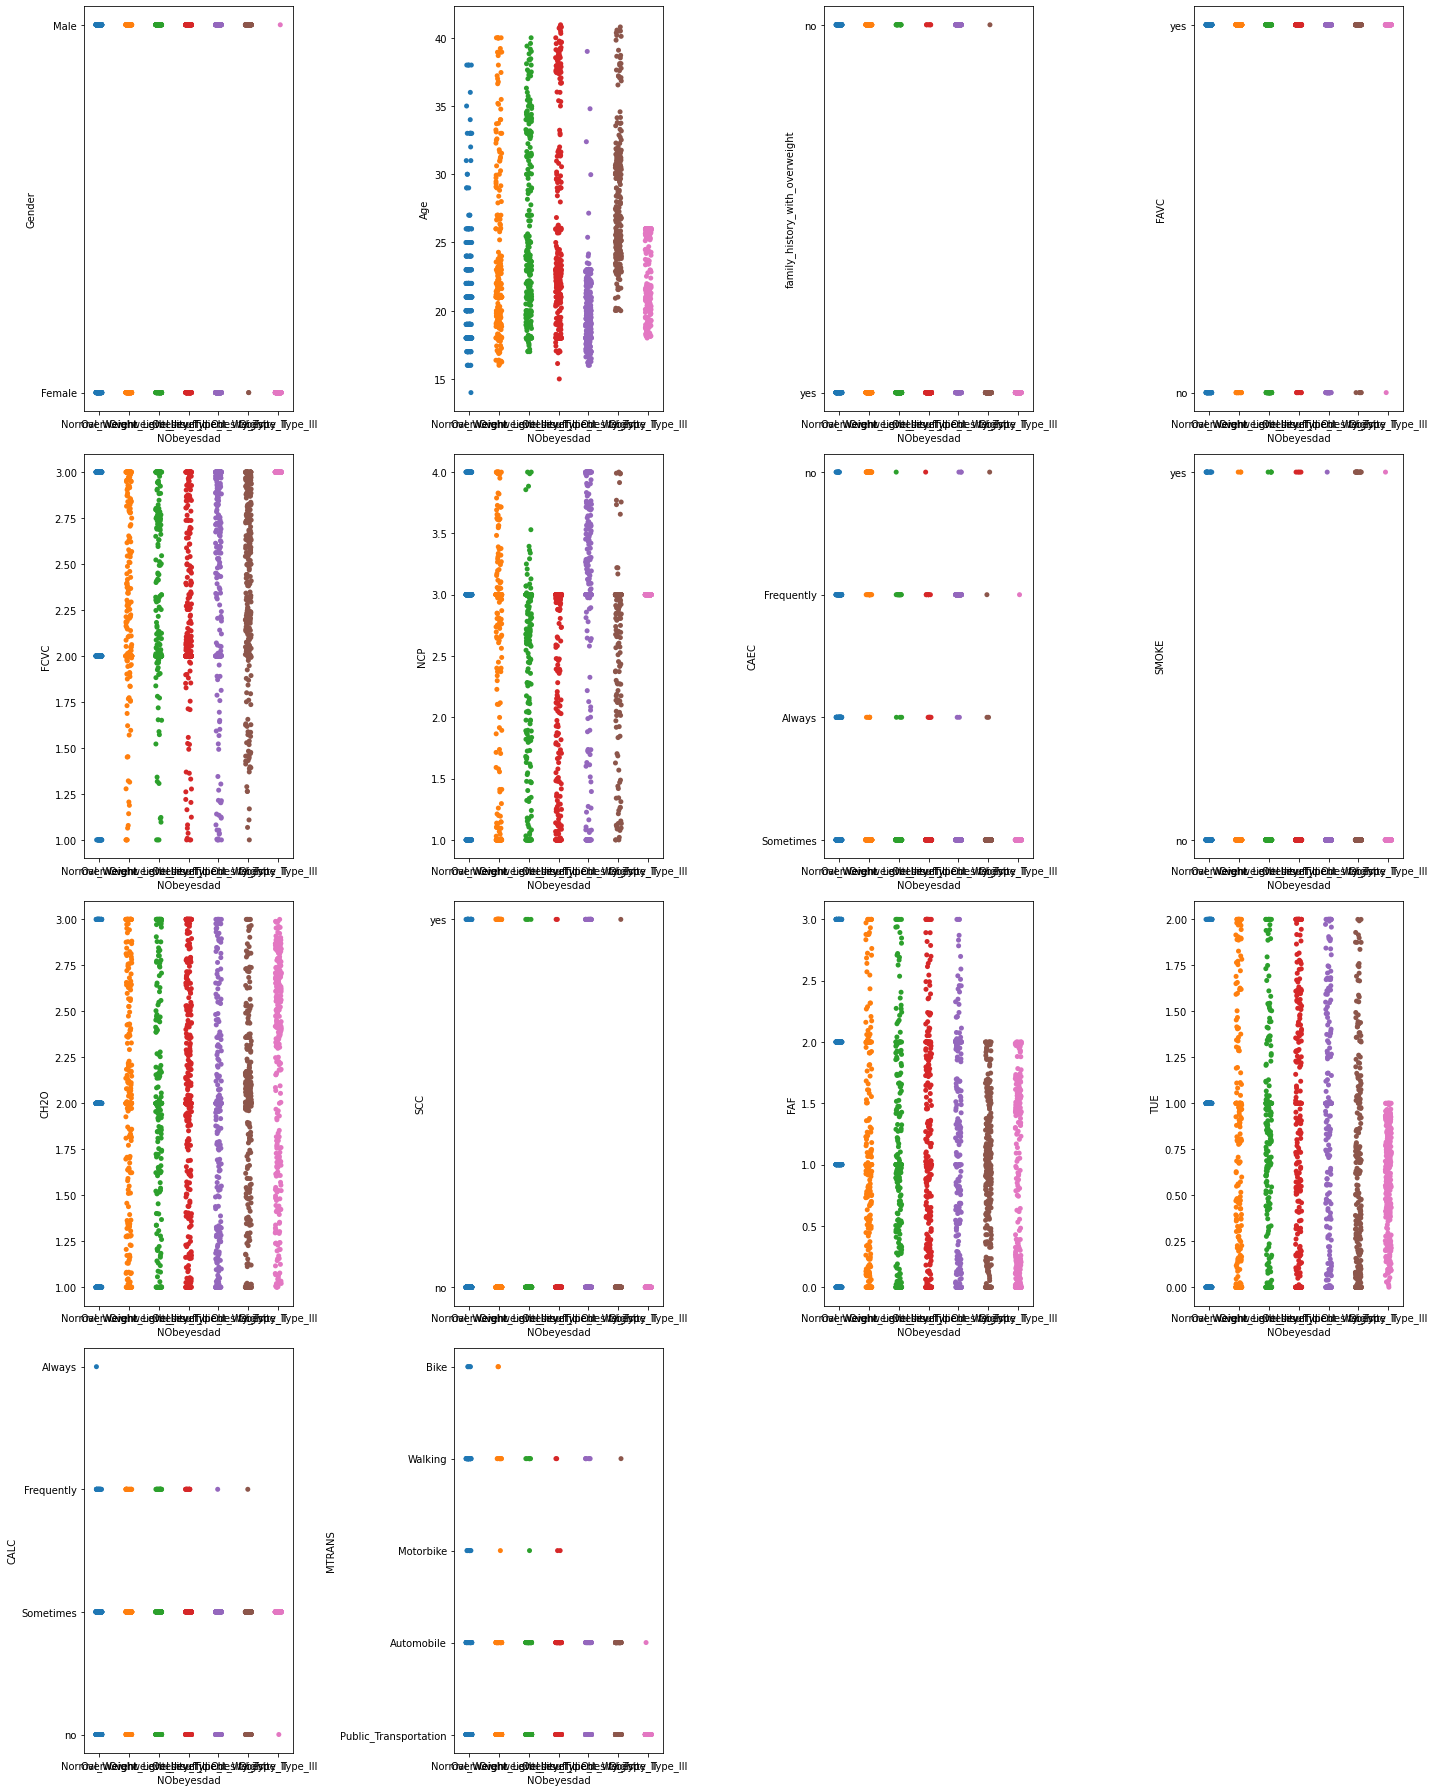

In [44]:
# let's see how data is distributed for every column with respect to labels
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in X:
     if plotnumber<=14 :
            ax = plt.subplot(4,4,plotnumber)
            sns.stripplot(y,X[column])
            plotnumber+=1
plt.tight_layout()

In [60]:
# introducing dummies for categorical features
x = pd.get_dummies(X,drop_first=True)

In [61]:
x

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0


In [62]:
# scaling the dataset
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [63]:
X_scaled

array([[-0.51685507, -0.78586118,  0.4034367 , ..., -0.06970715,
         0.5572429 , -0.1652949 ],
       [-0.51685507,  1.07935518,  0.4034367 , ..., -0.06970715,
         0.5572429 , -0.1652949 ],
       [-0.15646481, -0.78586118,  0.4034367 , ..., -0.06970715,
         0.5572429 , -0.1652949 ],
       ...,
       [-0.2422312 ,  1.07935518,  0.4034367 , ..., -0.06970715,
         0.5572429 , -0.1652949 ],
       [ 0.08894943,  1.07935518,  0.4034367 , ..., -0.06970715,
         0.5572429 , -0.1652949 ],
       [-0.03668748,  1.07935518,  0.4034367 , ..., -0.06970715,
         0.5572429 , -0.1652949 ]])

In [64]:
# checking for the correlation between the features
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = x.columns
#let's check the values
vif

,vif,Features
0,1.880884,Age
1,1.148668,FCVC
2,1.100902,NCP
3,1.144729,CH2O
4,1.164224,FAF
5,1.165481,TUE
6,1.216632,Gender_Male
7,1.318278,family_history_with_overweight_yes
8,1.165785,FAVC_yes
9,5.153109,CAEC_Frequently


we can see that CALC feature is highly correlated on other independent features. We need to remove it

In [65]:
x = x.drop(columns = ["CALC_Frequently","CALC_Sometimes","CALC_no"])

In [68]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

### Decision Tree
Since it is a multiclass classification problem. Therefore using decision tree algorithm.

In [86]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [96]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
feature_name

['Age',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'Gender_Male',
 'family_history_with_overweight_yes',
 'FAVC_yes',
 'CAEC_Frequently',
 'CAEC_Sometimes',
 'CAEC_no',
 'SMOKE_yes',
 'SCC_yes',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking']

In [100]:
clf.score(x_train,y_train)

1.0

In [101]:
py_pred = clf.predict(x_test)

In [102]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7292069632495164

### GridSearchCV

In [105]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
 'criterion': ['gini', 'entropy'],
 'max_depth' : range(2,32,1),
 'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
 'splitter' : ['best', 'random']

}

In [106]:
grid_search = GridSearchCV(estimator=clf,
 param_grid=grid_param,
cv=5,
 n_jobs =-1)

In [107]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [108]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}


In [109]:
grid_search.best_score_

0.7595394668602842

In [112]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =20, min_samples_leaf= 1, min_samples_split= 4, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=4)

In [113]:
clf.score(x_test,y_test)

0.7176015473887815

We got a little less score with gridsearchcv compared to decision tree model. The reason could be  - 
- Hyperparameter combinations- It's possible that none of the combinations in the grid were able to improve the model's performance
- Overfitting: GridSearchCV can sometimes select hyperparameters that lead to overfitting.
- Insufficient data or noise
- Model limitations: Decision trees have inherent limitations, such as their tendency to overfit and their inability to capture complex relationships in the data.


To address these issues, we can try the following:
- Expand the hyperparameter search space
- Try different algorithms
- Feature engineering
- Collect more data

machine learning is an iterative process, and finding the optimal model configuration often requires experimentation, evaluation, and fine-tuning.